## Activation Functions

Las funciones de activacion "quiebran" la linealidad. 
Son importantes para simular processos que no son lineales.


Vamos a hacer una lista:

* Logistic Sigmoid

$$ S(t) = \frac{1}{1 + \exp(-t)} $$.
La logistic fue usada mucho en los 90s. Fue muy popular.
Representa una probabilidad. Pero tiene un problema.
Sabemos $S'(t) = S(t) (1 - S(t))$. 
Para $t \gg 0$ $S(t) \approx 1$. Para $t \ll 0$, 
$S(t) \approx 0$. En cualquier caso $S'(t) \approx 0$
para $| t | \gg 0$. Este es un problema muy conocido
llamado "vanishing gradient". Recuerde que
$$ \theta^{(i)} = \theta^{(i-1)} - \alpha \nabla_{\theta} J(\theta^{(i-1)}) $$ si el gradiente en magnitud es muy pequeno, entonces $\theta \approx \theta^{(i-1)}$. 
La secuencia $\theta^{(0)} \rightarrow \theta^{(1)} \cdots \theta^{(i)}$ no va a converger. Se para el prcoesso. A esto lo llaman **vanishing gradient**

* Identidad $I$ no hace nada $I(x)=x$. Conserva la linealidad de la red y simula una regresion lineal.

* Heaviside (step function: la funcion scala)
\begin{eqnarray}
H(t) = \left \{  \begin{array}{cc}
1 & \text{si } t > 0 \\
0 & \text{si } t \le 0 
\end{array}
\right .
\end{eqnarray}

Nota: dado el probelma del **vanishing gradient** la funcion sigmoid perdio popularidad en los 90s y aparecio la tanh

* Tangente hiperobolica tanh. 

$$\tanh(t) = \frac{\sinh t}{\cosh t} = \frac{\mathrm{e}^{t} - \mathrm{e}^{-t}}{\mathrm{e}^{t} + \mathrm{e}^{-t}} = \frac{\mathrm{e}^{2t} -1 }{\mathrm{e}^{2t} + 1}$$



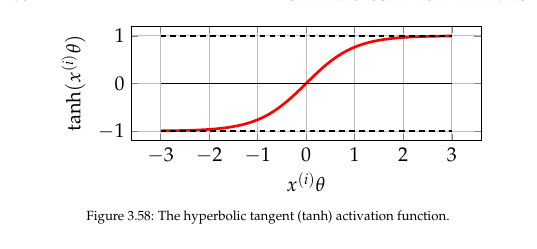

La funcion tanh tambien sufre el **vanishing gradient** (tarea). Es decir que el gradiente (la derivada) es muy pequeno para valores $| t | \gg 0$. 

Esto freno el uso de esta funcion en redes profundas (deep learning) .

Aparecio la ReLU.

* ReLU: Rectified Linear Unit.

\begin{eqnarray}
\text{ReLU}(t)  = \max \{0, t \} =
\left \{
    \begin{array}{cc}
    t & \text{si } t > 0 \\
    0 & \text{si } t \le 0 
    \end{array}
    \right . 
\end{eqnarray}

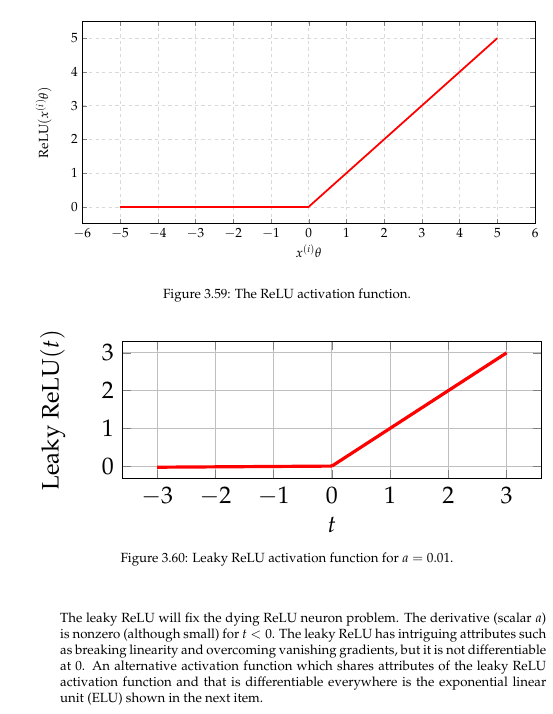

La ReLU tiene la ventaja de que para $t>0$ , $\nabla \text{ReLU}=1$. No sufre del "vanishing gradient". Pero para $t<0$, $\nabla \text{ReLU} = 0$, y este un problema. A este problema se le conoce como  el **dying ReLU neuron**

[dying Relu neuron](https://arxiv.org/abs/1903.06733)

Para evitar este problema se introduce la 

* Leaky ReLU: Es la ReLU en la parte positiva donde hay problema, pero para parte negativa se introduce un recta que no es horizontal. 

Matematicamente se definine como


\begin{eqnarray}
\text{ Leaky ReLU }(t) = \left \{  \begin{array}{cc}
a t & \text{si  } t < 0 \\
t & \text{si  } t \ge 0 
\end{array}
\right .
\end{eqnarray}
donde $a>0$ pero pequeño. Por ejemplo $a=0.01$. 


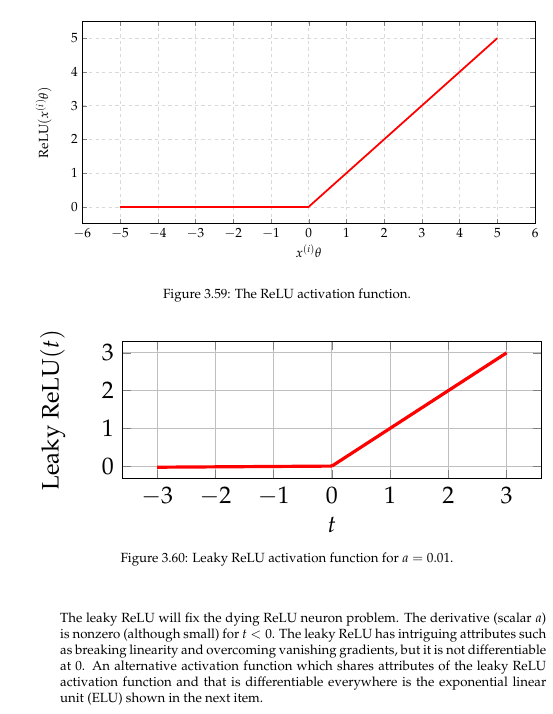

Ni la ReLU ni la leaky ReLU son diferenciables en 0. Entonces se introduce la exponential linear unit (ELU).

* ELU: Exponential linear unit:
\begin{eqnarray}
\text{ELU}(t) = \left  \{ \begin{array}{cc}
    \alpha ( \mathrm{e}^{t} - 1) & \text{si } t < 0 \\
    t & \text{si   } t \ge 0 
\end{array}
    \right .
\end{eqnarray}
Es diferenciable si $\alpha=1$. 

* La softmax (softargmax o normalized exponential function). (tambien se conoce como categorical activation function, en la literatura de DL)

\begin{eqnarray}
\sigma : \mathrm{R}^k  &\to& [0,1]^K \\
    (z_i) &\mapsto&  \frac{\exp(z_i)}{\sum_{j=1}^K \exp(z_j)}
\end{eqnarray}



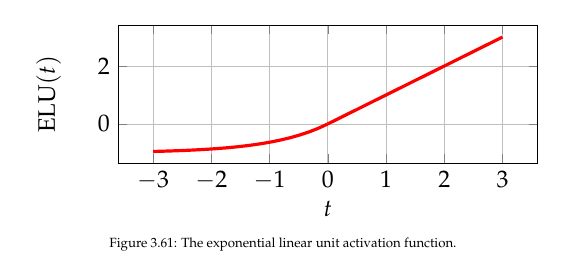

## Forward Propagation (propagacion hacia adelante)

Como, yo pienso, que es complicado comenzamos con lo mas 
sencillo. 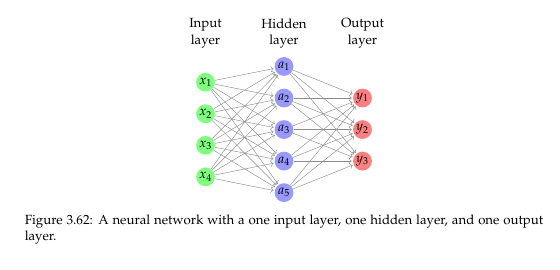

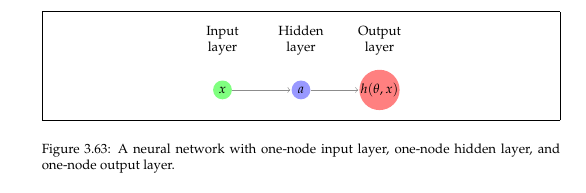

Este el modelo mas simple. La negacion (logica).

| $x$ | $ \sum \theta_i x_i $ | $ \ge$ umbral | not $x$ |
|:---:|:---:|:---:|:---:|
| 0 | 0 | 0 | 1  |
| 1 | -1 | 0 | 0 |

Como se propaga la informacion.

* Arrancamos de los datos $x$ , tenemos pesos $\theta^{(1)}$ ,
hacemos el promedio ponderado $z^{(2)} = x \theta^{(1)}$. 

* Aplicamos la funcion de activacion. Por ejemplo vamos a usar en esta clase la logistic.

$$ a^{(2)} = S(z^{(2)} ) = \frac{1}{1+ \mathrm{e}^{-z^{(2)}}}$$

* Hallamos $z^{(3)}$ que es una funcion lineal de $a^{(2)}$ y el peso $\theta^{(2)}$. $z^{(3)} = a^{(2)} \theta^{(2)}$. 

Finalmente la hipotesis es $a^{(3)}=h(\theta, x)$. Se construye con la activacion de $z^{(3)} $

Es decir:

$$a^{(3)} = h(\theta, x) = S(z^{(3)} = \frac{1}{1 + \mathrm{e}^{-z^{(3)}}} $$  En este momento se identifica si $a^{(3)}>0.5$ es verdadero o si no falso. 

| $x$ | $ S(\sum \theta_i x_i) $ | $ \ge$ umbral | not $x$ |
|:----:|:----:|:----:|:----:|
| 0 | 0 | 0 | 1  |
| 1 | -1 | 0 | 0 |

umbral $\frac12$. 

* varios nodos en la primera capa, un nodo en la oculta y uno nodo de salida. 




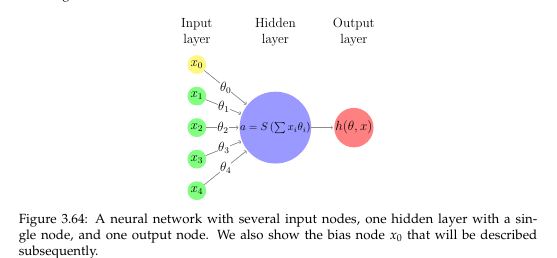

* Pesar todos los datos entrada con los pesos $\theta_i$.

$$ z^{(2)} (\theta, x) = x_0 \theta_0 + x_1 \theta_1 + x_2 \theta_2 + x_3 \theta_3 $$
y en general

$$ z^{(2)} = \sum_i x_i \theta_i = x^T \Theta $$

* Aplicamos la activacion

$$ a^{(2)} = \frac{1}{1 + \mathrm{e}^{-z^{(2)}}} $$


* $$z^{(3)} = a^{(2)} \theta_2  $$

$$a^{(3)} = h(\theta, x) = \frac{1}{1 + \mathrm{e}^{-z^{(3)}}} $$

* Varios nodos de entrada, varios ocultos y uno de salida.



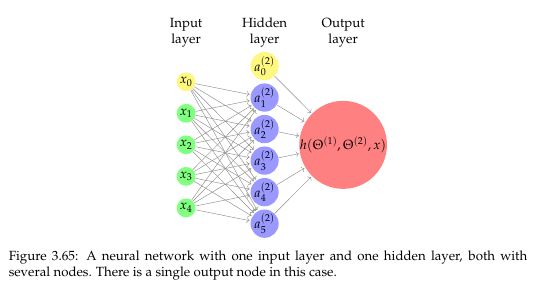

* Construyamos los $z$s de la capa 2.

\begin{eqnarray}
z_1^{(2)} &=& \sum_{j=0}^n x_j \theta_{j1}^{((1)} \\
z_2^{(2)} &=& \sum_{j=0}^n x_j \theta_{j2}^{(1)}\\
\vdots &=& \vdots \\
z_m^{(2)} &=& \sum_{j=0}^n x_j \theta_{jm}^{(1)}
\end{eqnarray}
Vectorizar:

$$ z^{(2)} = x^T \Theta^{(1)}$$
donde $\Theta$ es una matriz conde la columna $k$ esta dada por
$\theta_{jk}$, $j=1,2, \cdots, n$. 

Donde
$$ z^{(2)} = \begin{pmatrix}z_1^{(2)} & z_2^{(2)}  & \cdots & z^{(m)} \end{pmatrix} $$

Si $x \in \mathbb{R}^{n \times 1} $, $\theta \in \mathbb{R}^{n \times m}$, 
entonces $x^T \theta \in \mathbb{R}^{1 \times m}$ 

Si lo quiere como vector columna escriba $z^{(2)} = (\Theta^{(1)})^T x$

* Activacion $a^{(2)}$. 

\begin{eqnarray}
a_0^{(2)} &=& 1 \\
a_i^{(2)}(x, \Theta_i^{(1)}) &=& \frac{1}{1 + \mathrm{e}^{-z_i^{(2)}}}
\end{eqnarray}

* Ahora calculamos $z^{(3)}$.

$$ z^{(3)} = \sum_{j=0}^m a_j^{(2)} \theta_j^{(2)} = (a^{(2)})^T \theta  $$

Finalmente $a^{(3)}$

$$ a^{(3)} = h(\theta, x) = \frac{1}{1 + \mathrm{e}^{-z^{(3)}}} $$

* Varios de entrada, varios ocultos, varios de salida. 




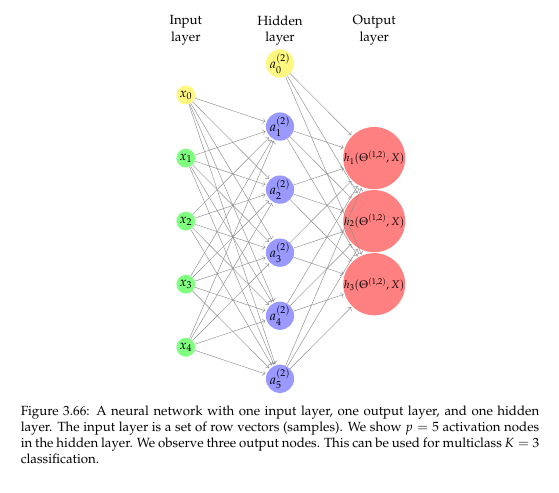

* $z_i^{(2)} = x^T \Theta_i^{(1)}$
donde $\Theta_i^{(1)}$ es la columna $i$ de la matriz $\Theta^{(1)}$ que conecta la entrada con la primera capa (oculta).

* Aplicamos la activacion

$$ a_i^{(2)} = \frac{1}{1 + \mathrm{e}^{-z_i^{(2)}}} \quad , i=1,2, \cdots, p \quad , \quad a_0^{(2)}=1  $$

* Hallamos $z^{(3)}$. 

$$ z_i^{(3)} = \sum_{k=0}^p a_k^{(2)} \theta_{ki}^{(2)} $$
vectorizada:

$$ z_i^{(3)} = a^{(2)} \Theta_i^{(2)} $$
Aca $\Theta_i^{(2)}$ es la columna $i$ de la matriz $\Theta^{(2)}$.

La ultima activacion $a^{(3)}$, 

$$a_i^{(3)} = h_i(\Theta, x) =  \frac{1}{1 + \mathrm{e}^{-z_j^{(3)}}} \quad , \quad  1, 2, 3, \cdots , K $$

Este es el punto en que se usa la softmax. 


* Ultimo caso: Vectores de entrada, varios nodos ocultos y varios de salida.

* Calcular $z^{(2)}$

$$z_{ij}^{(2)} = \sum_{k=0}^n x_{ik} \theta_{kj}^{(1)} \quad , i=1,  \cdots, m \quad , j = 0, \cdots , p  $$
Aca $z_{ij}^{(2)}$ es un node $j$ pesado con los $\theta$.
Matricialmente

$$ Z^{(2)} = X \Theta^{(1)}$$
con dimensiones

$$Z_{m \times p}^{(2)} = X_{m \times n} \Theta_{n \times p}^{(1)} $$

Podemos calcular $A^{(2)}$.

$$  a_{ij}^{(2)} = \frac{1}{1 + \mathrm{e}^{-z_{ij}^{2}}} $$
o de forma matricial

$$ A^{(2)} = \frac{1}{1 + \mathrm{e}^{-Z^{(2)}}}$$
Se calcula componente a componente.


* $Z^{(3)}$. 

$$ z_{ij}^{(3)} = \sum_{k=0}^p a_{ik}^{(2)} \theta_{kj}^{(2)}$$

O en forma matricial 

$$ Z^{(3)} = A^{(2)} \Theta^{(2)}$$

### Bias.
Cuando pensamos en regresion lineal, por ejemplo,
$\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_m x_m$ $

Aca $\theta_0$ es el intercepto o el "bias". El coeficiente de
$\theta_0=1$. Si es regresion multivarida tiene un sistem
de ecuaciones

$$\theta_0 + \theta_1 x_{i1} + \theta_2 x_{i2} + \cdots + \theta_m x_{im} , i=1,2, \cdots, n $$

La matriz tiene la primera columna con unos $1$.

El sesgo (bias) es importante por que sin el estamos forzando a pasar todos los $z$ por el origen. 



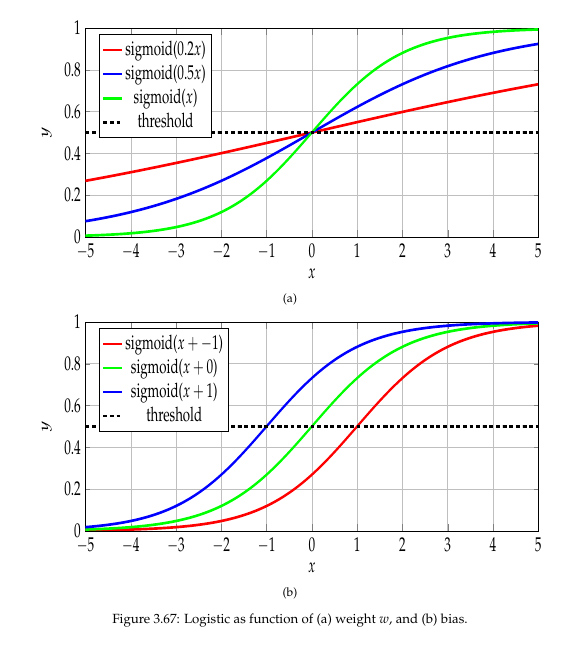

con el sesgo podria yo hacer que la S (sigmoid) tomara valores muy cercanos a cero

$$ \frac{1}{1 + \mathrm{e}^{-\sum \theta_i x_i}} \to 0$$,
$\theta_0 + \sum_{i=1}^n \theta_i x_i \ll -1$, esto lo puedo
lograr con $\theta_0 \ll -1 - \sum_{i=1}^n \theta_i x_i$
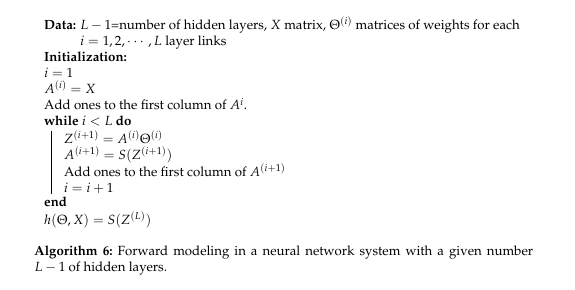


Recuerde que el XOR no funciono con redes sin capa oculta (Mculloc-Pitts) Vamos a usar 3 capas (una oculta) para
mostrar como simular el XOR.

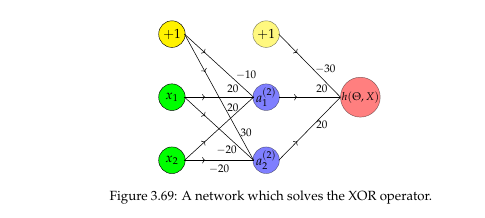

El threshold es 1/2

Usamos la hipotesis para determinar la salida de esta forma

\begin{eqnarray}
y = \left \{
    \begin{array}{cc}
    1 & \text{si  } h(\Theta ,X) \ge \text{threshold} \\
    0 & \text{si  } h(\Theta ,X) \lt \text{threshold}
    \end{array}
    \right . 
\end{eqnarray}

Recuerde las ecuaciones

\begin{eqnarray}
Z^{(\ell +1)} &=& X \Theta^{(\ell)} \\
A^{(\ell+1)} &=& S(Z^{(\ell+1)}) 
\end{eqnarray}

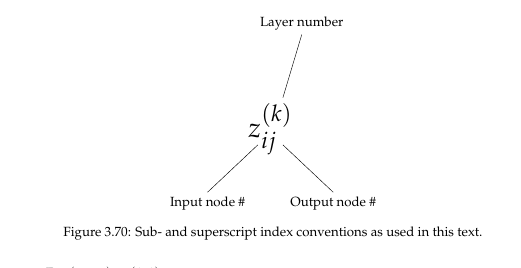



$$(x_1, x_2)=(1,1)$$

$$ z_{11}^{(2)} = -10 + 20 x_1 + 20 x_2 = -10 + 20 + 20 =30 $$
$$ a_{11}^{(2)} = \frac{1}{1 + \mathrm{e}^{-30}} = 0.9999999999999065
$$

$$z_{12}^{(2)} = 30-20 x_1 -20 x_2 = -10 =$$
$$ a_{12}^{(2)} = S(-10) =  4.5397868702434395e-05 $$
$$z_{11}^{(3)} = -30 + 20 a_{11}^{(2)} + 20 a_{12}^{(2)} = -9.99909204262782
$$

$$h(\Theta, x^{(1)} ) = S(z_{11}^{(3)}  ) =  4.543910487654583e-05
< 0.5 $$

de forma que

$$ y \biggl |_{(1,1)} \biggr . = 0$$

Ahora para $(x_1, x_2)=(1,0)$

$$z_{21}^{(2)} = -10 + 20 x_1 + 20 x_2 = 10 $$

$$ a_{21}^{(2)} = S(10) \approx 1 $$

$$ z_{22}^{(2)} = 30 -20 x_1 -20 x_2 = 10 $$
$$ a_{22}^{(2)}  \approx 1$$


$$ z_{21}^{(3)} = -30 + 20 a_{21}^{(2)} + 20 a_{22}^{(2)} = 10$$

De forma que

$$ h(\Theta, x^{(2)}) = S(10) = 0.99995452$$

$ 0.99995452>0.5$ la respuesta es 1

$$  y  \biggl |_{(1,0)} \biggr . = 1$$

Tercer punto $(x_1, x_2)=(0,1)$

$$ z_{31}^{(2)} = -10 + 20 x_1 + 20 x_2 = 10$$
$$ a_{31}^{(2)} = S(10) \approx 1 $$

$$ z_{32} = 30 - 20 x_1 - 20 x_2 = 10 $$
$$ a_{32}^{(2)}  \approx 1 $$ 

Entonces:

$z_{31}^{(3)} =-30 + 20 a_{21}^{(2)} + 20 a_{22}^{(2)} \approx 10$

$$ h(\Theta, x^{(3)}) = S(10) =  0.9999545 > 0.5$$
$$ y  \biggl |_{(0,1)} \biggr . = 1$$ 


Por ultimo para $x_1, x_2) = (0,0)$

$$z_{41}^{(2)} = -10 + 20 x_1 + 20 x_2 = -10 $$
$$a_{41}^{(2)} = S(-10) \approx 0 $$

$$ z_{42}^{(2)} = 30 -20 x_1 -20 x_2 = 30 $$
$$ a_{42}^{(2)} = s(30) \approx 1.  $$

Entonces

$$ z_{41}^{(3)} = -30 + 20 a_{41}^{(2)} + 20 a_{42}^{(2)} \approx -10 $$

de forma que

$$h(\Theta, x^{(4)}) =  S(z_{41}^{(3)} = S(-10) \approx 0 < 0.5$$

de forma que

$$  y  \biggl |_{(0,0)} \biggr . = 0$$




Los datos de entrada:

\begin{eqnarray}
X= \begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 0 \\
1 & 0 & 1 \\
1 & 0 & 0 
\end{pmatrix}
\quad , \quad 
\Theta^{(1)} = \begin{pmatrix}
-10 & 30 \\
20 & -20 \\
20 & -20 
\end{pmatrix}  \quad , \quad 
\Theta^{(2)} = 
\begin{pmatrix}
-30 \\
20 \\
20 
\end{pmatrix}
\end{eqnarray}

In [ ]:
import numpy as np

def s(x):
    return 1/(1 + np.exp(-x))


X=np.array([[1,1], [1,0],[0,1], [0,0]])
n=len(X)

ones = np.ones( shape=(n,1), dtype='float')
X = np.column_stack( (ones, X))
Theta1 = np.array( [[-10, 30], [20,-20], [20,-20]])
Theta2 = np.array([[-30],[20],[20]])
Z1 = X.dot(Theta1)
A = s(Z1)

A = np.column_stack((ones, A))
Z2 = A.dot(Theta2)
H = s(Z2)


B = (H > 0.5)
B


array([[False],
       [ True],
       [ True],
       [False]])

[video de intuicion de ANN](https://www.youtube.com/watch?v=aircAruvnKk)